In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/ML_csvs/mnist_train.csv") #load the data into a pandas dataframe
data.head(5) #Show the first 5 rows

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel780  pixel781  pixel782  pixel783  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0  

[5 rows x 785 columns]

In [ ]:
data.isnull().values.any()

True

In [ ]:
data=data.dropna()

In [ ]:
label=data['label'] # save label data for later use
data.drop('label', axis = 1, inplace = True)

<ipython-input-65-bd4662380cb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('label', axis = 1, inplace = True)


In [ ]:
from sklearn.preprocessing import StandardScaler
data_standardized = StandardScaler().fit_transform(data)

In [ ]:
covMatrix = np.matmul(data_standardized.T ,data_standardized) # matrix multiplication in numpy
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)

In [ ]:
eigen_pair = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]

# Sort the pairs according to decreasing eigenvalues
eigen_pair.sort(key=lambda x: x[0], reverse=True)

In [ ]:
keep_variance=0.75

required_variance = keep_variance * sum(eigenvalues)

required_dim = 0
variance = 0
for i in range(len(eigen_pair)):
    variance += eigen_pair[i][0]
    if variance >= required_variance:
        required_dim = i + 1
        break

print('Total Dimensions: {}'.format(len(eigen_pair)))
print('Required Dimensions: {}'.format(required_dim))

Total Dimensions: 784
Required Dimensions: 105


###Projection Matrix

In [ ]:
projection_matrix = np.empty(shape=(data_standardized.shape[1], required_dim))

for index in range(required_dim):
    eigenvector = eigen_pair[index][1]
    projection_matrix[:, index] = eigenvector

print('Projection Matrix Shape: \n {}'.format(projection_matrix.shape))

Projection Matrix Shape: 
 (784, 105)


In [ ]:
basis = projection_matrix.reshape(28, 28, required_dim)

plt.figure(figsize=(10, 20))

for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.imshow(basis[:,:,i], 'gray')
    plt.title('Basis Vector {}'.format(i+1))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train.reshape((X_train.shape[0], -1))

# Center the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Compute covariance matrix
cov_matrix = np.cov(X_centered.T)

# Compute eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

# Select top k eigenvectors
k = 105
top_k_eig_vecs = eig_vecs[:, :k]

# Encode data
X_pca = np.dot(X_centered, top_k_eig_vecs)

# Reconstruct images
X_reconstructed = np.dot(X_pca, top_k_eig_vecs.T) + X_mean

# Display original and reconstructed images for a few randomly selected images
n_images = 5
fig, ax = plt.subplots(n_images, 2, figsize=(8, 12))
for i in range(n_images):
    # Randomly select an image
    idx = np.random.randint(X.shape[0])
    # Display original image
    ax[i, 0].imshow(X[idx].reshape(28, 28), cmap='gray')
    ax[i, 0].set_title('Original')
    ax[i, 0].axis('off')
    # Display reconstructed image
    ax[i, 1].imshow(np.abs(X_reconstructed[idx]).reshape(28, 28), cmap='gray')
    ax[i, 1].set_title('Reconstructed')
    ax[i, 1].axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train.reshape((X_train.shape[0], -1))

# Center the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Compute covariance matrix
cov_matrix = np.cov(X_centered.T)

# Compute eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]

# Select top k eigenvectors
k = 510
top_k_eig_vecs = eig_vecs[:, :k]

# Encode data
X_pca = np.dot(X_centered, top_k_eig_vecs)

# Reconstruct images
X_reconstructed = np.dot(X_pca, top_k_eig_vecs.T) + X_mean

# Display original and reconstructed images for a few randomly selected images
n_images = 5
fig, ax = plt.subplots(n_images, 2, figsize=(8, 12))
for i in range(n_images):
    # Randomly select an image
    idx = np.random.randint(X.shape[0])
    # Display original image
    ax[i, 0].imshow(X[idx].reshape(28, 28), cmap='gray')
    ax[i, 0].set_title('Original')
    ax[i, 0].axis('off')
    # Display reconstructed image
    ax[i, 1].imshow(np.abs(X_reconstructed[idx]).reshape(28, 28), cmap='gray')
    ax[i, 1].set_title('Reconstructed')
    ax[i, 1].axis('off')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
principal=PCA(n_components=3)
principal.fit(data_standardized)
x=principal.transform(data_standardized)
x

array([[-5.03744844, -5.54959338,  3.69224675],
       [19.33232575,  6.03178232,  1.27494428],
       [-7.65671224, -1.89032408,  2.44649737],
       ...,
       [ 1.15745397,  1.87513713,  9.03837975],
       [-5.09627881, -2.57115505, -2.91826894],
       [-5.13473413,  1.26160008, -3.95072424]])

In [ ]:
import keras 
from  keras.datasets import mnist
import numpy as NP
(X_TRAIN,Y_TRAIN),(X_TEST,Y_TEST) = mnist.load_data()

In [ ]:
X_TRAIN = NP.reshape(X_TRAIN,(60000,784))
X_TEST = NP.reshape(X_TEST,(10000,784))
X_TRAIN = X_TRAIN/255
X_TEST = X_TEST/255
print("Shape of Train Data: {}".format(X_TRAIN.shape))
print("Shape of Train Data: {}".format(X_TEST.shape))

Shape of Train Data: (60000, 784)
Shape of Train Data: (10000, 784)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(32)
pca.fit(X_TRAIN)
TRAIN= pca.transform(X_TRAIN)
TEST = pca.transform(X_TEST)
approximation = pca.inverse_transform(TEST)

In [ ]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TEST[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(NP.abs(approximation[i]).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
pca = PCA(128)
pca.fit(X_TRAIN)
TRAIN= pca.transform(X_TRAIN)
TEST = pca.transform(X_TEST)
approximation_TRAIN = pca.inverse_transform(TRAIN)
approximation_TEST = pca.inverse_transform(TEST)

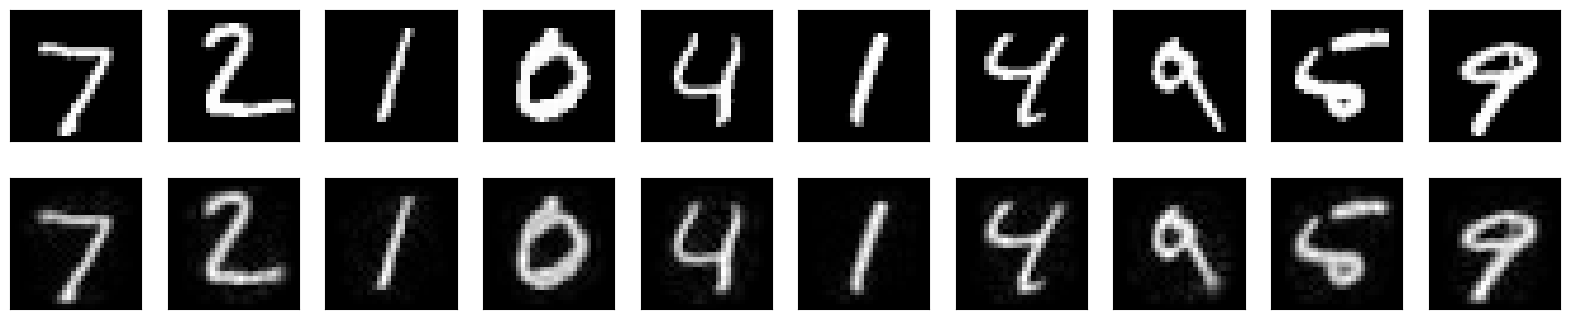

In [ ]:
import matplotlib.pyplot as plt

#encoded_imgs = autoencoder.predict(X_TEST)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_TEST[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(NP.abs(approximation_TEST[i]).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()